# Importing the relevant libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

### Importing the Database

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User Classification Project/ml_datasource.csv')

In [ ]:
raw_data.shape

(17761, 8)

In [ ]:
raw_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17752 non-null  object 
 1   days_on_platform        17761 non-null  int64  
 2   minutes_watched         17761 non-null  float64
 3   courses_started         17761 non-null  int64  
 4   practice_exams_started  17761 non-null  int64  
 5   practice_exams_passed   17761 non-null  int64  
 6   minutes_spent_on_exams  17761 non-null  float64
 7   purchased               17761 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
data = raw_data.copy()

### Removing Outliers

In [ ]:
numerical = data.select_dtypes(include=['int64','float64']).columns

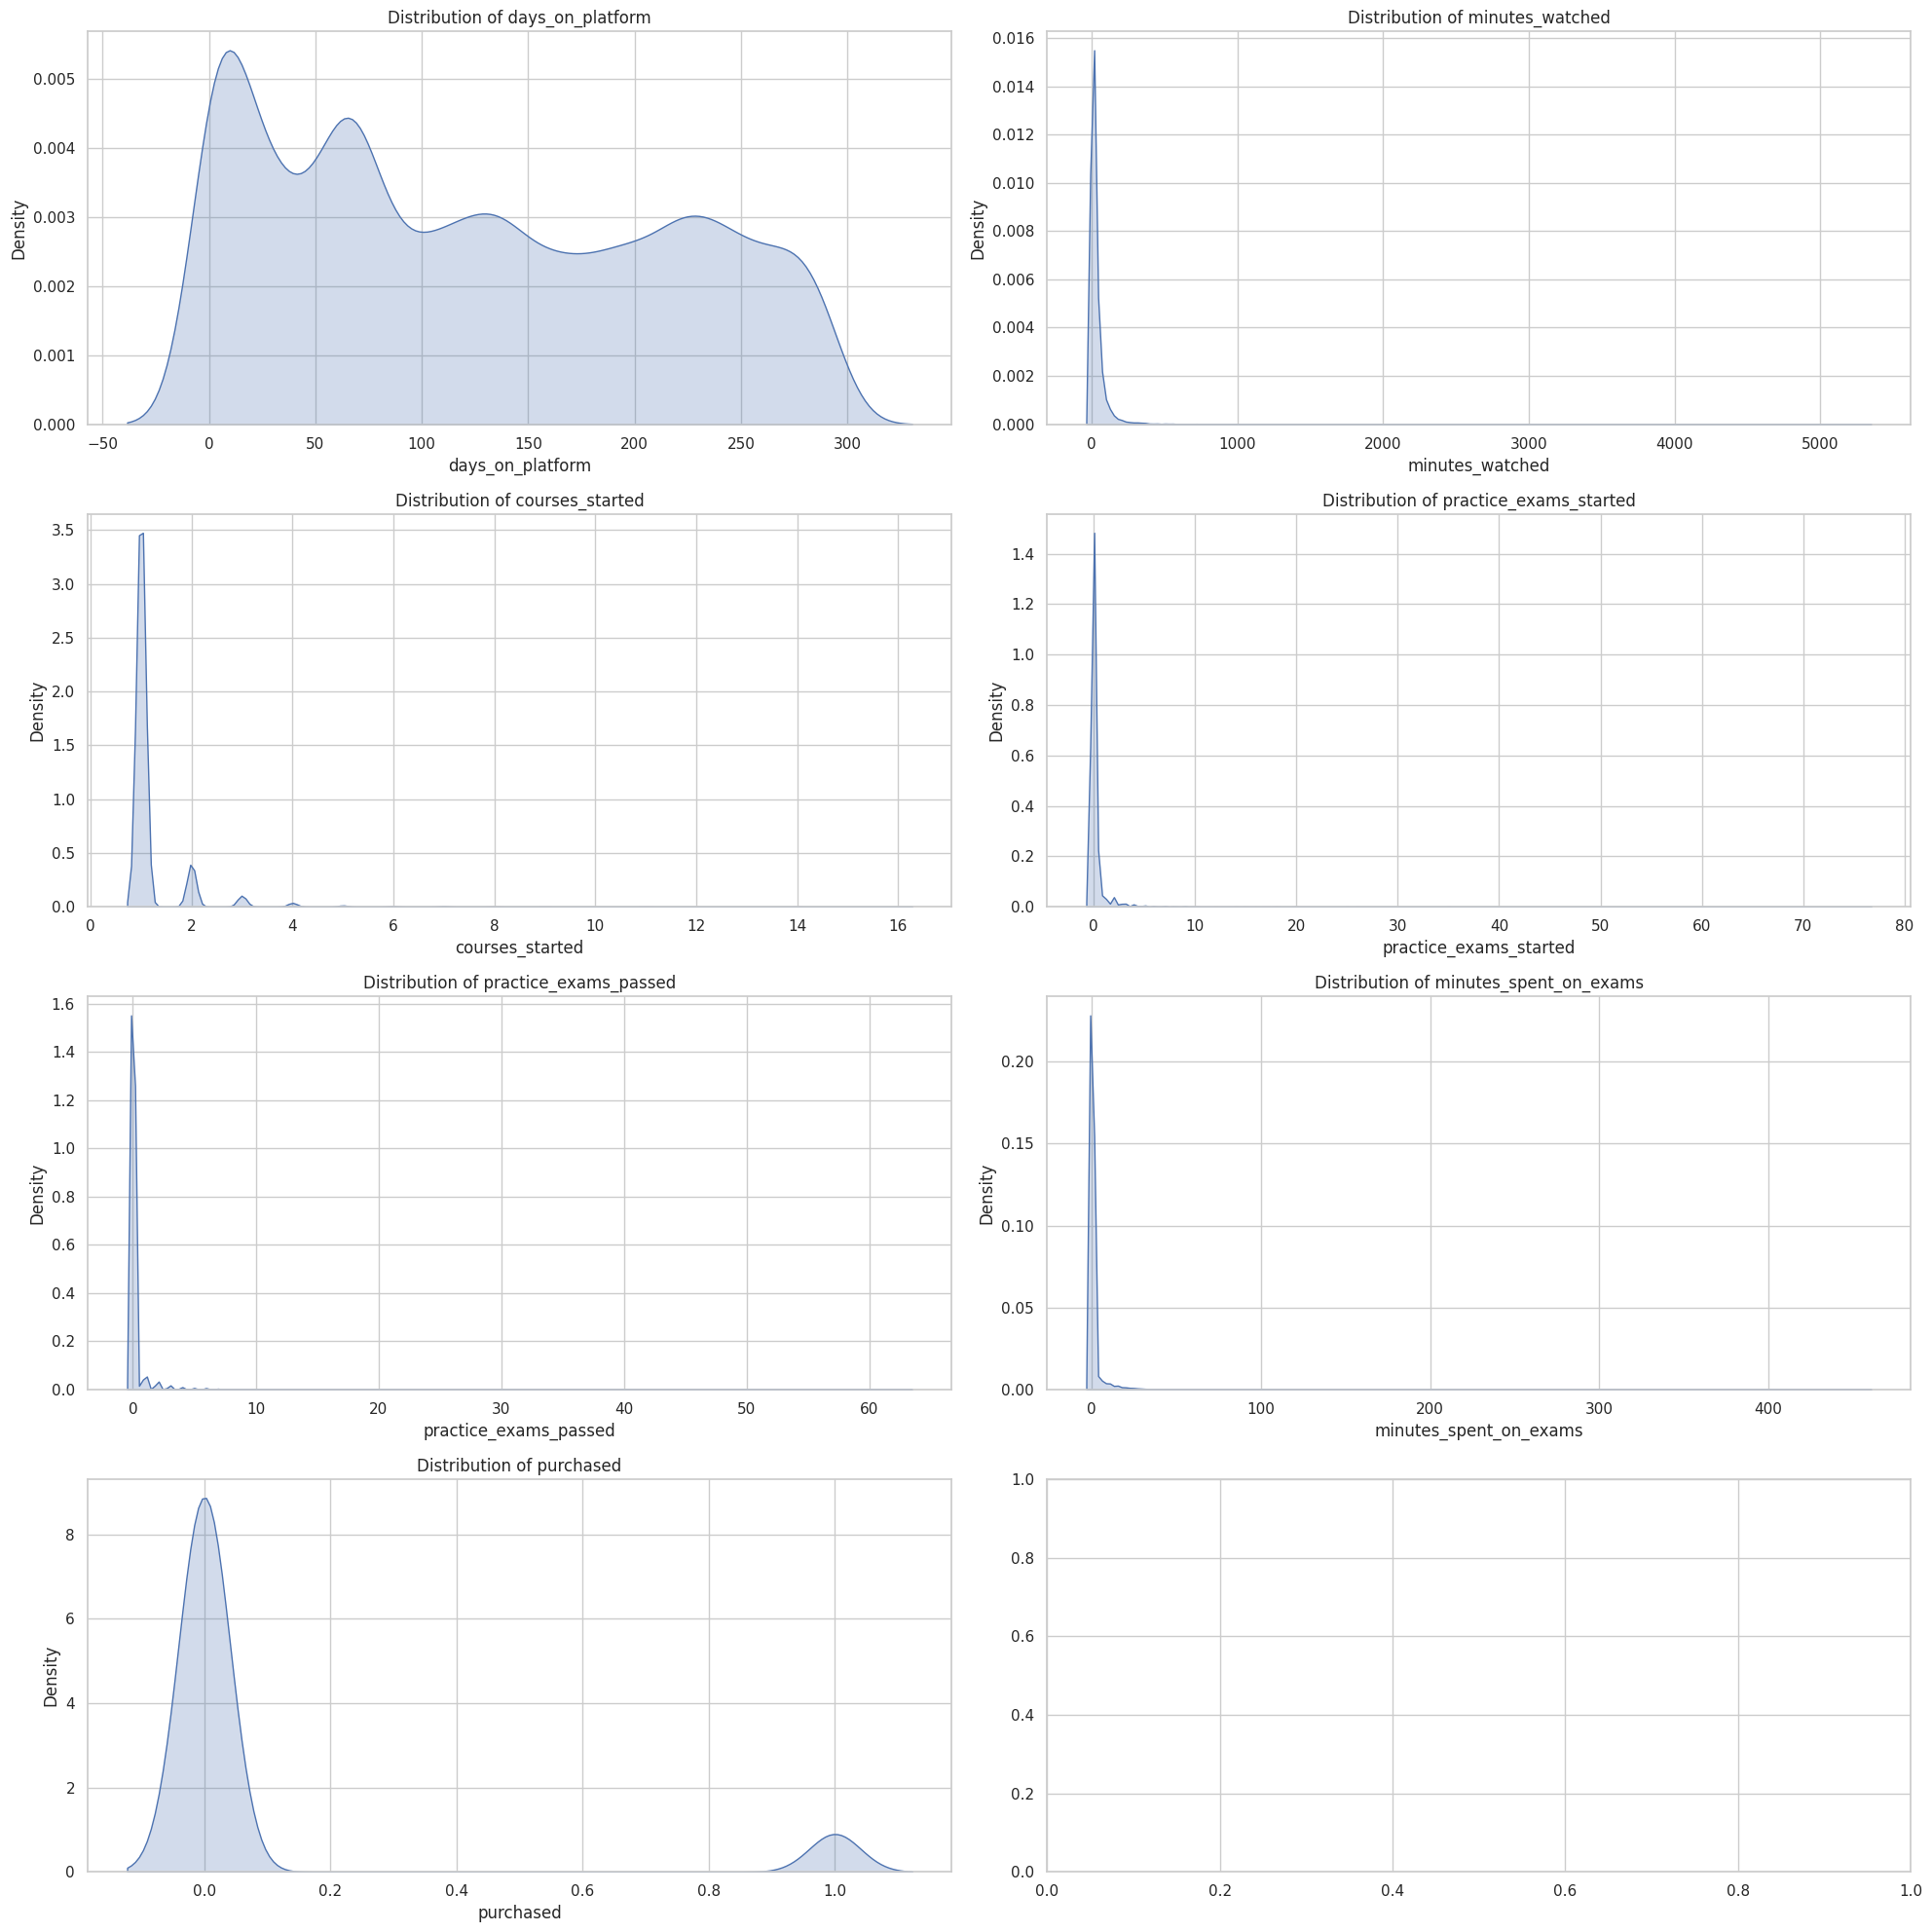

In [ ]:
sns.set(style="whitegrid")

num_features = len(numerical)
fig, axes = plt.subplots((num_features // 2) + (num_features % 2), 2, figsize=(20, 20))

for i, feature in enumerate(numerical):
    row, col = divmod(i, 2)   # row -> i=7 // 2 -> 3, col -> iasub % 2 -> 1
    sns.kdeplot(data[feature], fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
skewness = data[numerical].skew()
print(skewness)

days_on_platform           0.263594
minutes_watched           18.790416
courses_started            6.230362
practice_exams_started    16.538525
practice_exams_passed     18.799842
minutes_spent_on_exams    20.530941
purchased                  2.827031
dtype: float64


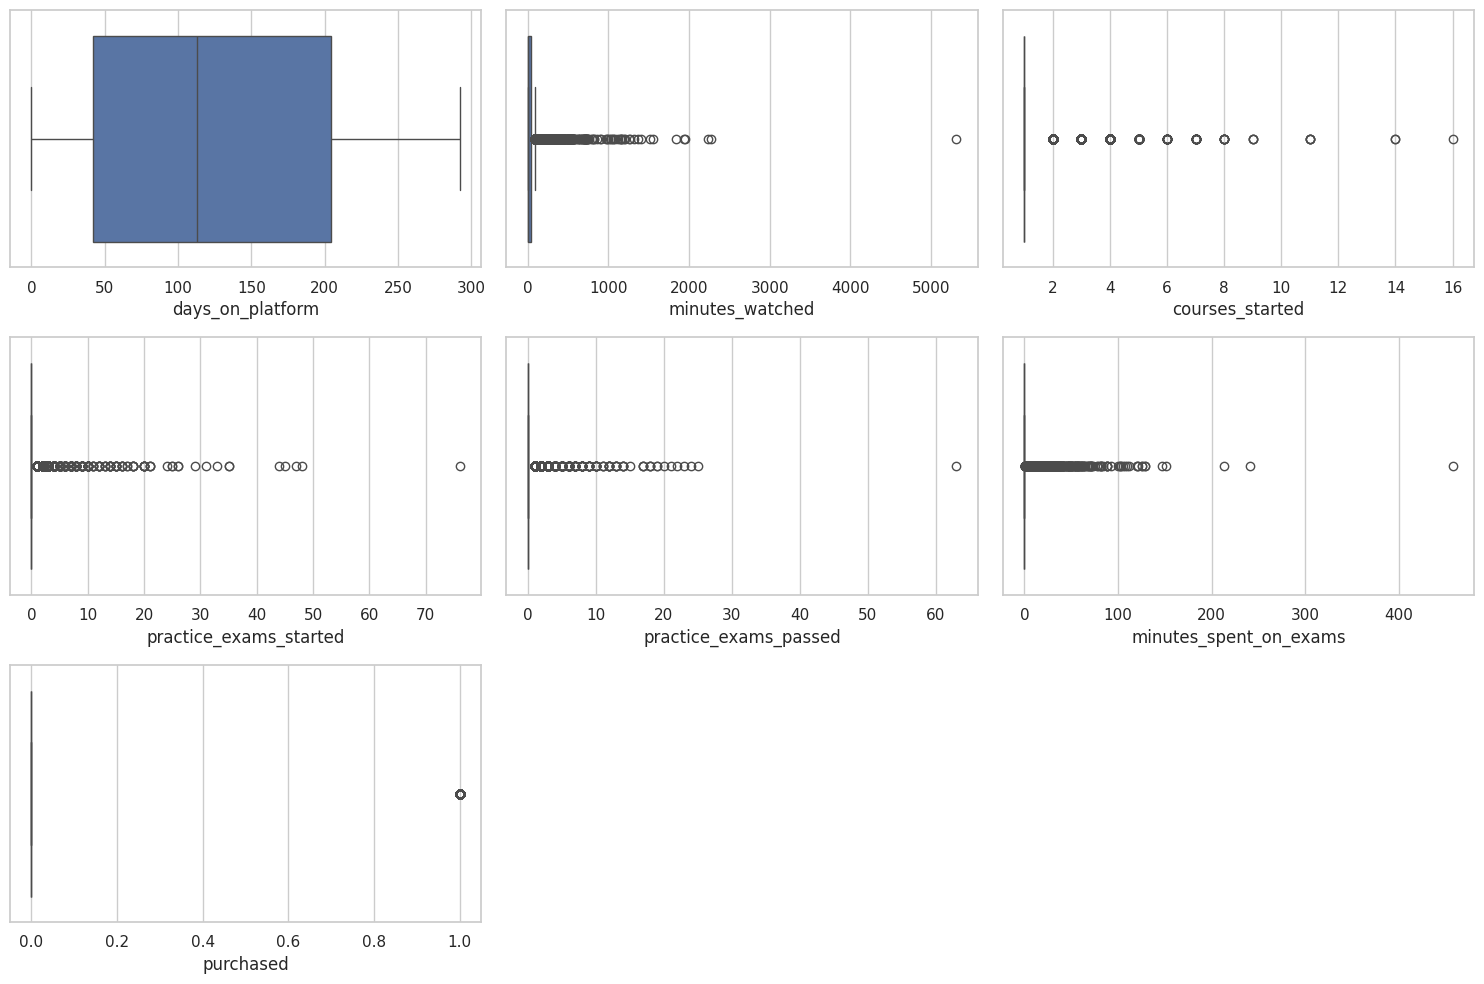

In [ ]:
place = 1
plt.figure(figsize=(15, 10))
for i in data[numerical]:
    plt.subplot(len(numerical) // 3+1, 3, place)
    place += 1
    sns.boxplot(data=data, x=i)
plt.tight_layout()
plt.show()

In [ ]:
uw = 1000
data['minutes_watched'] = np.where(data['minutes_watched']>uw, uw, data['minutes_watched'])

In [ ]:
uw = 10
data['courses_started'] = np.where(data['courses_started']>uw, uw, data['courses_started'])

In [ ]:
uw = 10
data['practice_exams_started'] = np.where(data['practice_exams_started']>uw, uw, data['practice_exams_started'])

In [ ]:
uw = 40
data['minutes_spent_on_exams'] = np.where(data['minutes_spent_on_exams']>uw, uw, data['minutes_spent_on_exams'])

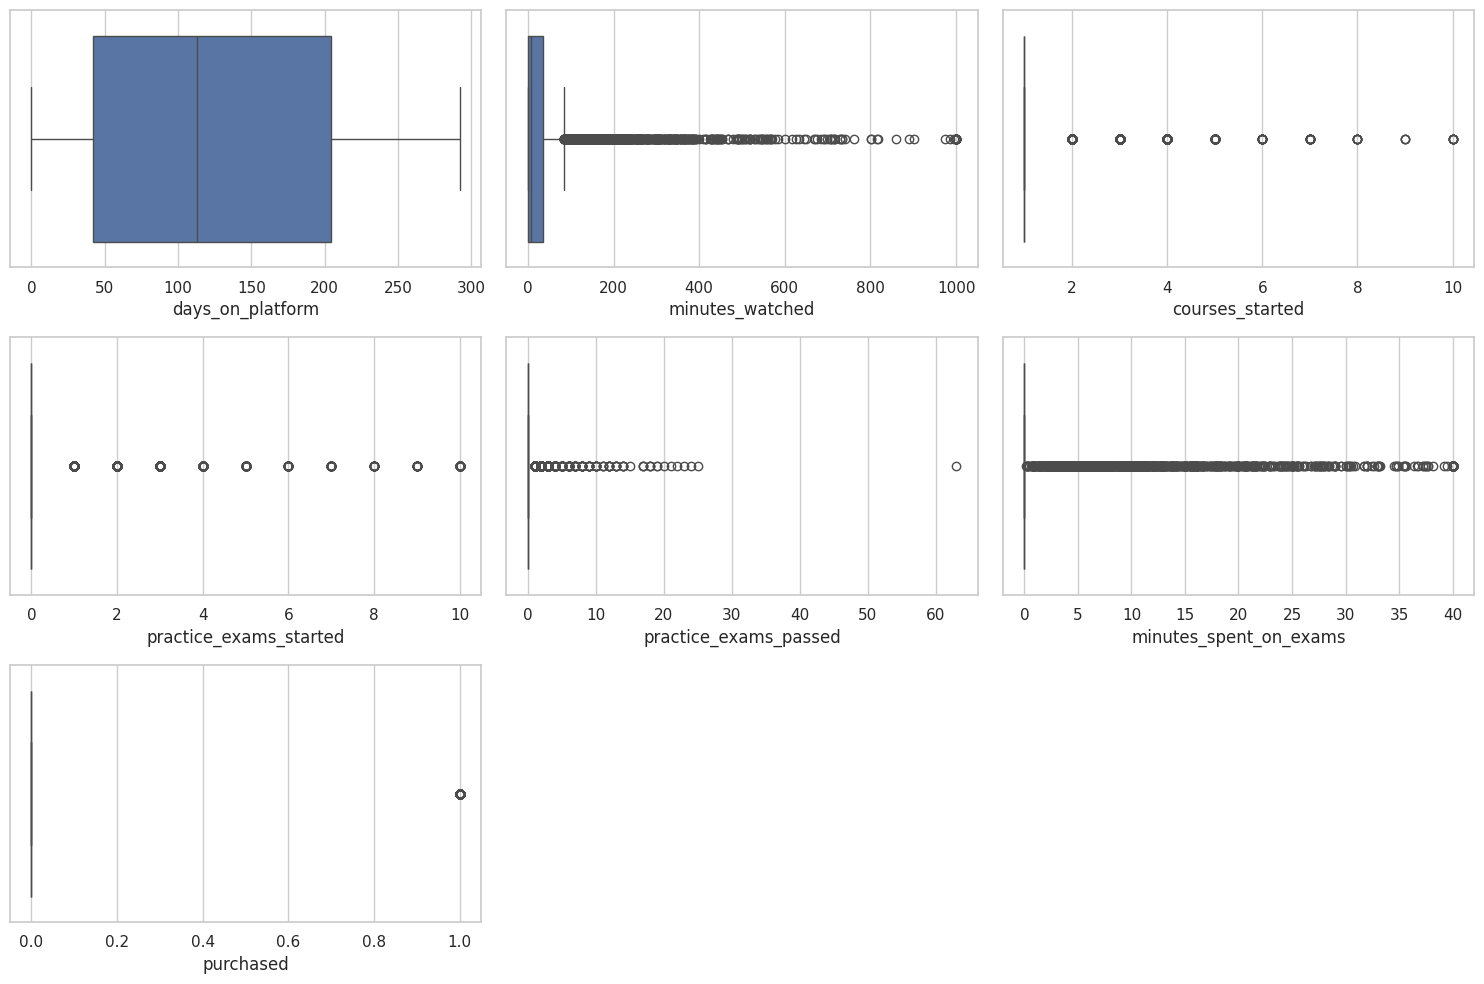

In [ ]:
place = 1
plt.figure(figsize=(15, 10))
for i in data[numerical]:
    plt.subplot(len(numerical) // 3+1, 3, place)
    place += 1
    sns.boxplot(data=data, x=i)
plt.tight_layout()
plt.show()

### Checking for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(data[numerical])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                  feature       VIF
0                   const  7.830354
1        days_on_platform  1.210836
2         minutes_watched  1.953534
3         courses_started  1.532975
4  practice_exams_started  6.438807
5   practice_exams_passed  3.159992
6  minutes_spent_on_exams  4.345624
7               purchased  1.217160


In [ ]:
data.drop("practice_exams_started", axis = 1, inplace = True)

### Dealing with NaN Values

In [ ]:
data.isnull().sum()

,0
student_country,9
days_on_platform,0
minutes_watched,0
courses_started,0
practice_exams_passed,0
minutes_spent_on_exams,0
purchased,0


In [ ]:
data.loc[data['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
526,NaN,70,801.2,3,10,40.00,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


In [ ]:
data.fillna('NAM', inplace = True)
data.isnull().sum()

,0
student_country,0
days_on_platform,0
minutes_watched,0
courses_started,0
practice_exams_passed,0
minutes_spent_on_exams,0
purchased,0


### Splitting the Data

In [ ]:
y = data['purchased'].copy()
X = data.drop('purchased', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365, stratify=y)

In [ ]:
X_test.shape

(3553, 6)

### Encoding the Data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = 170)

X_train['student_country_enc'] = enc.fit_transform(X_train['student_country'].to_numpy().reshape(-1,1))

X_test['student_country_enc'] = enc.transform(X_test['student_country'].to_numpy().reshape(-1,1))

X_train.drop(columns = ['student_country'], inplace = True)
X_test.drop(columns = ['student_country'], inplace = True)

X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

In [ ]:
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

# Creating a Logistic Regression Model

In [ ]:
import statsmodels.api as sm

log_reg = sm.Logit(y_train_array, X_train_array)

log_reg_results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.158817
         Iterations 10


In [ ]:
print(log_reg_results.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14208
Model:                          Logit   Df Residuals:                    14202
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.4823
Time:                        17:39:21   Log-Likelihood:                -2256.5
converged:                       True   LL-Null:                       -4359.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0669      0.002    -32.196      0.000      -0.071      -0.063
x2             0.0106      0.001     16.480      0.000       0.009       0.012
x3            -0.2297      0.058     -3.974      0.0

In [ ]:
prediction = log_reg_results.predict(X_test_array)

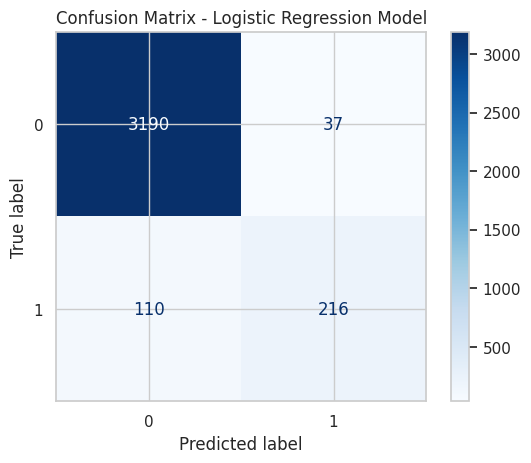

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.round(prediction)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()


# Creating a K-Nearest Neighbors Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

parameters_knn = {
    'n_neighbors': np.arange(1, 51),
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator = knn, param_grid = parameters_knn, scoring='accuracy', cv = 5)

grid_search_knn.fit(X_train_array, y_train_array)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
knn_clf = grid_search_knn.best_estimator_
y_test_pred_knn = knn_clf.predict(X_test_array)

In [ ]:
print("Best parameters:", grid_search_knn.best_params_)
print("Best accuracy:", grid_search_knn.best_score_)

Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Best accuracy: 0.9591783725834213


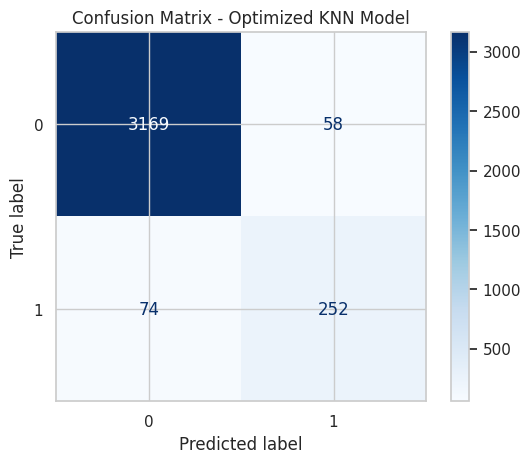

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Optimized KNN Model")
plt.show()

In [ ]:
print("Classification Report - Optimized KNN Model")
print(classification_report(y_test, y_test_pred_knn, target_names=['Class 0', 'Class 1']))

Classification Report - Optimized KNN Model
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98      3227
     Class 1       0.81      0.77      0.79       326

    accuracy                           0.96      3553
   macro avg       0.90      0.88      0.89      3553
weighted avg       0.96      0.96      0.96      3553



# Creating a Support Vector Machines Model

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

parameters_svc = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : np.arange(1, 11),
    'gamma': ['scale', 'auto']
}

scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(X_train_array)
x_test_scaled = scaler.transform(X_test_array)

grid_search_svc = GridSearchCV(estimator = SVC(), param_grid = parameters_svc, scoring = 'accuracy', cv = 5)

grid_search_svc.fit(x_train_scaled, y_train_array)

svm_best = grid_search_svc.best_estimator_
print("Best Parameters:", grid_search_svc.best_params_)


y_test_pred_svc = svm_best.predict(x_test_scaled)

cm_svc = confusion_matrix(y_test, y_test_pred_svc)

disp = ConfusionMatrixDisplay(confusion_matrix = cm_svc)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Support Vector Machines Model")
plt.show()

KeyboardInterrupt: 

In [ ]:
print("Best Kernal:", grid_search_svc.best_params_['kernel'])
print("Best C:", grid_search_svc.best_params_['C'])
print("Best Gamma", grid_search_svc.best_params_['gamma'])

Best Kernal: poly
Best C: 9
Best Gamma scale


In [ ]:

print("Classification Report - Optimized SVM Model")
print(classification_report(y_test, y_test_pred_svc, target_names=['Class 0', 'Class 1']))


Classification Report - Optimized SVM Model
              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98      3227
     Class 1       0.85      0.72      0.78       326

    accuracy                           0.96      3553
   macro avg       0.91      0.86      0.88      3553
weighted avg       0.96      0.96      0.96      3553



# Creating a Decision Trees Model

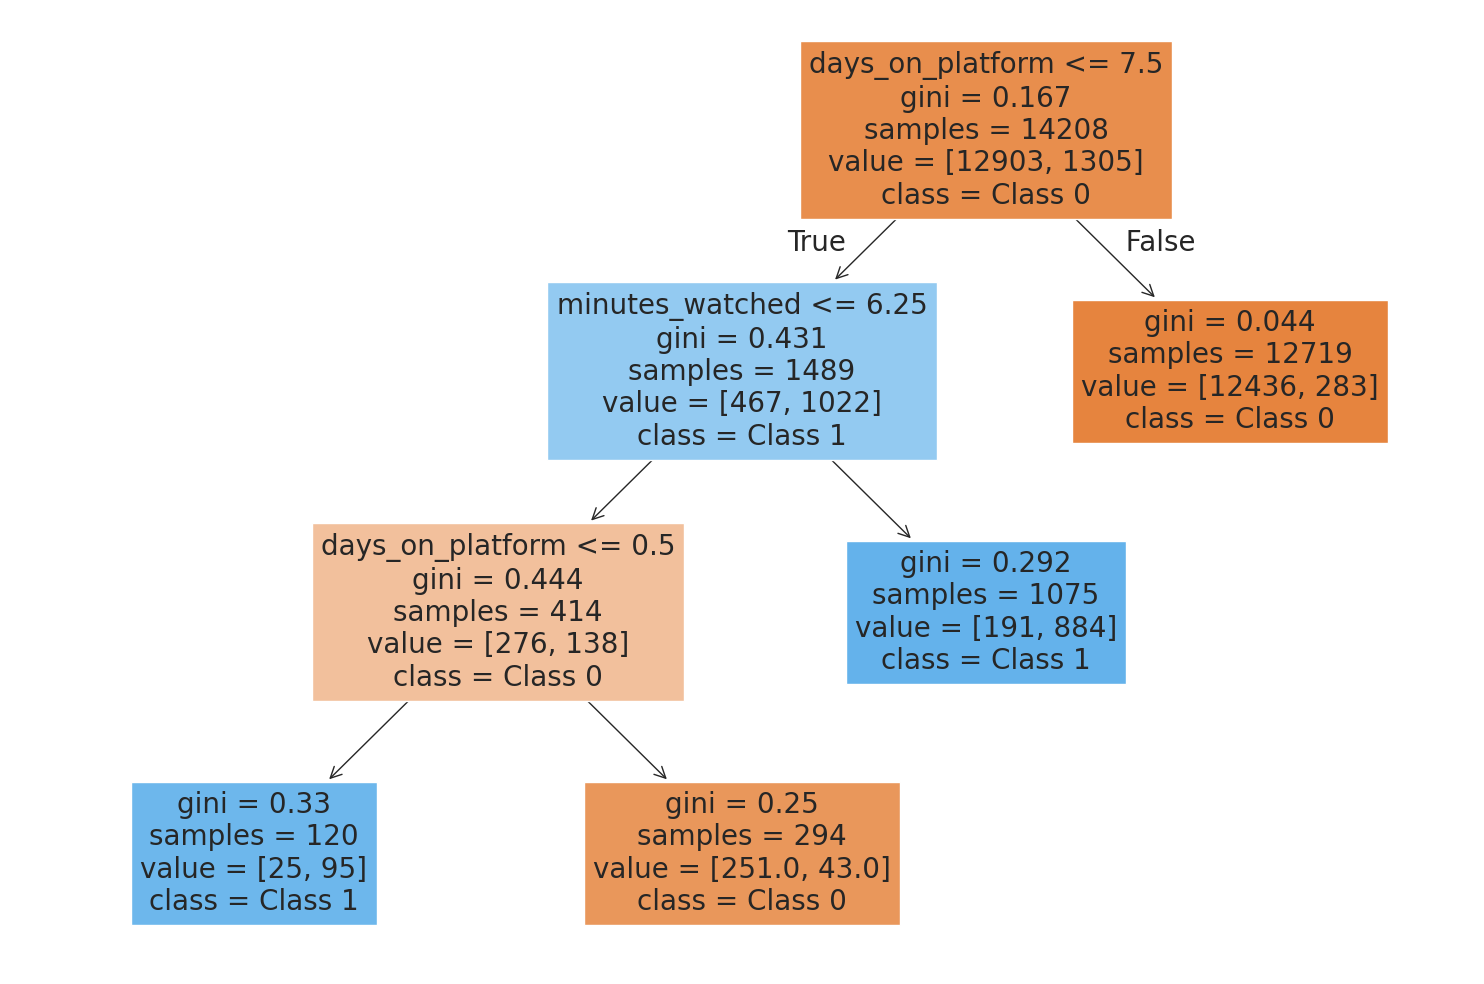

In [ ]:
from  sklearn.tree import DecisionTreeClassifier, plot_tree

parameters_dtc = {
    'ccp_alpha' : [0, 0.001, 0.002, 0.003, 0.004],
}

grid_search_dtc = GridSearchCV(estimator = DecisionTreeClassifier(random_state=365), param_grid = parameters_dtc, scoring = 'accuracy', cv = 5)

grid_search_dtc.fit(X_train_array, y_train_array)

dtc_best = grid_search_dtc.best_estimator_

plt.figure(figsize=(15,10))
plot_tree(dtc_best, filled = True, feature_names = X_train.columns,
          class_names = ['Class 0', 'Class 1'])
plt.tight_layout()
plt.show()


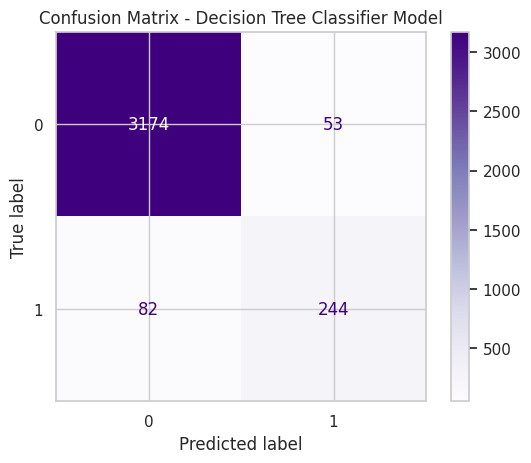

In [ ]:
y_test_pred_dtc = dtc_best.predict(X_test_array)

cm_dtc = confusion_matrix(y_test_array, y_test_pred_dtc)

disp = ConfusionMatrixDisplay(confusion_matrix = cm_dtc)


disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Decision Tree Classifier Model")
plt.show()

In [ ]:
print(classification_report(y_test_array, y_test_pred_dtc, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      3227
     Class 1       0.82      0.75      0.78       326

    accuracy                           0.96      3553
   macro avg       0.90      0.87      0.88      3553
weighted avg       0.96      0.96      0.96      3553



In [ ]:
best_alpha = grid_search_dtc.best_params_['ccp_alpha']
best_accuracy = grid_search_dtc.best_score_

print(f"The best ccp_alpha value is: {best_alpha}")
print(f"The best accuracy achieved is: {best_accuracy}")

The best ccp_alpha value is: 0.003
The best accuracy achieved is: 0.961008193832097


# Creating a Random Forests Model

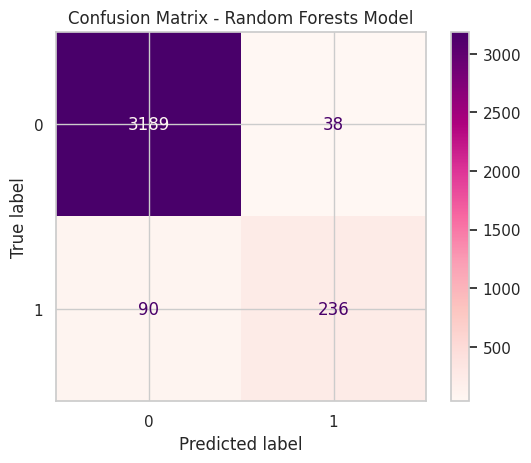

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters_rfc = {
    'ccp_alpha' : [0.003]
}
rfc = RandomForestClassifier(random_state = 365, ccp_alpha = 0.003)
rfc = rfc.fit(X_train_array, y_train_array)
y_test_pred_rfc = rfc.predict(X_test_array)

cm_rfc = confusion_matrix(y_test_array, y_test_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rfc)
disp.plot(cmap='RdPu')
plt.title("Confusion Matrix - Random Forests Model")
plt.show()

In [ ]:
print(classification_report(y_test_array, y_test_pred_rfc, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98      3227
     Class 1       0.86      0.72      0.79       326

    accuracy                           0.96      3553
   macro avg       0.92      0.86      0.88      3553
weighted avg       0.96      0.96      0.96      3553

